## DTW to calculate distance between cell pairs using cells' intensity data
### Visualization using heat maps, dendrograms, multidimensional scaling

In [ ]:
! pip install dtaidistance

In [ ]:
!pip install adjustText

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from dtaidistance import dtw, clustering, similarity
import seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
from sklearn.manifold import MDS
from adjustText import adjust_text
from scipy.spatial.distance import squareform

In [ ]:
import matplotlib.pylab as pylab
params = {
    'font.size': 12,
    'legend.fontsize':'large',
    'figure.titlesize':'large',
    'axes.grid':False,
    'axes.labelsize':'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'large',
    'ytick.labelsize':'large',
    #'figure.figsize': (5, 6)
    }
pylab.rcParams.update(params)

In [ ]:
def extract_intensity_arrays(df, column_name='eGFP Intensity'):
    """
    Extract eGFP intensity values for each cell group in the dataframe

    Parameters:
    - df (DataFrame): The dataframe containing the data
    - column_name (str): The name of the column containing eGFP intensity values

    Returns:
    - intensity_arrays (list of arrays): A list containing numpy arrays of eGFP intensity values for each cell group
    """
    # Group the dataframe by 'Cell' column
    grouped = df.groupby('Cell')

    # Initialize an empty list to store the arrays
    intensity_arrays = []

    # Iterate over each group
    for cell, group in grouped:
        # Extract the eGFP intensity values as a numpy array
        intensity_values = group[column_name].values

        # Append the array to the list
        # intensity_arrays.append(intensity_values)

        # Standardize the intensity values within the group
        mean_intensity = np.mean(intensity_values)
        std_intensity = np.std(intensity_values)
        standardized_intensity_values = (intensity_values - mean_intensity) / std_intensity
        # Append the standardized array to the list
        intensity_arrays.append(standardized_intensity_values)

    return intensity_arrays


def plot_distance_matrix_and_clusters(intensity_arrays, compact=False):
    """
    Plot distance matrix and hierarchical clusters for the given intensity arrays

    Parameters:
    - intensity_arrays (list of arrays): List containing numpy arrays of intensity values for each cell group
    """

    # Model 1: Hierarchical clustering
    model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
    cluster_idx = model1.fit(intensity_arrays)
    print("Cluster indices (Model 1):", cluster_idx)

    # Model 2: Hierarchical clustering with tree structure
    model2 = clustering.HierarchicalTree(model1)
    cluster_idx = model2.fit(intensity_arrays)
    print("Cluster indices (Model 2):", cluster_idx)

    # Calculate distance matrix and squash it
    profiles_distance_matrix = similarity.squash(dtw.distance_matrix(intensity_arrays, compact=compact))
    print(f'mean distance = {np.mean(profiles_distance_matrix):.4f}')
    #Note: distance = 0 for similar; = 1 for dissimilar

    return profiles_distance_matrix

In [ ]:
data = 'experiment'
file_name = 'experimental data.xlsx'
sheets = ['plaque 1','plaque 2','plaque 3','plaque 4','plaque 5','plaque 6','plaque 7','plaque 8']

# data = 'toy-similar'
# file_name = 'S1-40.xlsx'
# sheets = ['plaque 1','plaque 2','plaque 3','plaque 4']

# data = 'toy-similar'
# file_name = 'S2.xlsx'
# sheets = ['plaque 1','plaque 2','plaque 3','plaque 4']

# data = 'toy-dissimilar'
# file_name = 'S3.xlsx'
# sheets = ['plaque 1','plaque 2','plaque 3','plaque 4','plaque 5','plaque 6']

plaque_dfs = []

# Loop through plaques
for plaque_num in range(1, len(sheets)+1):
    # Read the DataFrame for the current plaque
    plaque_df = pd.read_excel(file_name, f'{sheets[plaque_num-1]}')

    # Add 'Plaque' column with current plaque number
    plaque_df['Plaque'] = plaque_num

    # Create 'ID' column
    plaque_df['ID'] = 'P' + plaque_df['Plaque'].astype(str) + 'C' + plaque_df['Cell'].astype(str)

    # Append the modified DataFrame to the list
    plaque_dfs.append(plaque_df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(plaque_dfs, ignore_index=True)


# Group the dataframe by 'Cell' column
grouped = combined_df.groupby('ID')
intensity_arrays = []

# Iterate over each group
for cell, group in grouped:
    # Extract the eGFP intensity values as a numpy array
    intensity_values = group['eGFP Intensity'].values
    # # Append the array to the list
    # intensity_arrays.append(intensity_values)

    # Standardize the intensity values within the group
    mean_intensity = np.mean(intensity_values)
    std_intensity = np.std(intensity_values)
    standardized_intensity_values = (intensity_values - mean_intensity) / std_intensity
    # Append the standardized array to the list
    intensity_arrays.append(standardized_intensity_values)

profiles_distance_matrix = plot_distance_matrix_and_clusters(intensity_arrays, compact=False)
linkage = hc.linkage(sp.distance.squareform(np.round(profiles_distance_matrix, 2)), method='average')

 99%|█████████▉| 152/153 [00:00<00:00, 3534.32it/s]


Cluster indices (Model 1): {0: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152}}


 99%|█████████▉| 152/153 [00:00<00:00, 3121.31it/s]


Cluster indices (Model 2): {0: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152}}
mean distance = 0.4696


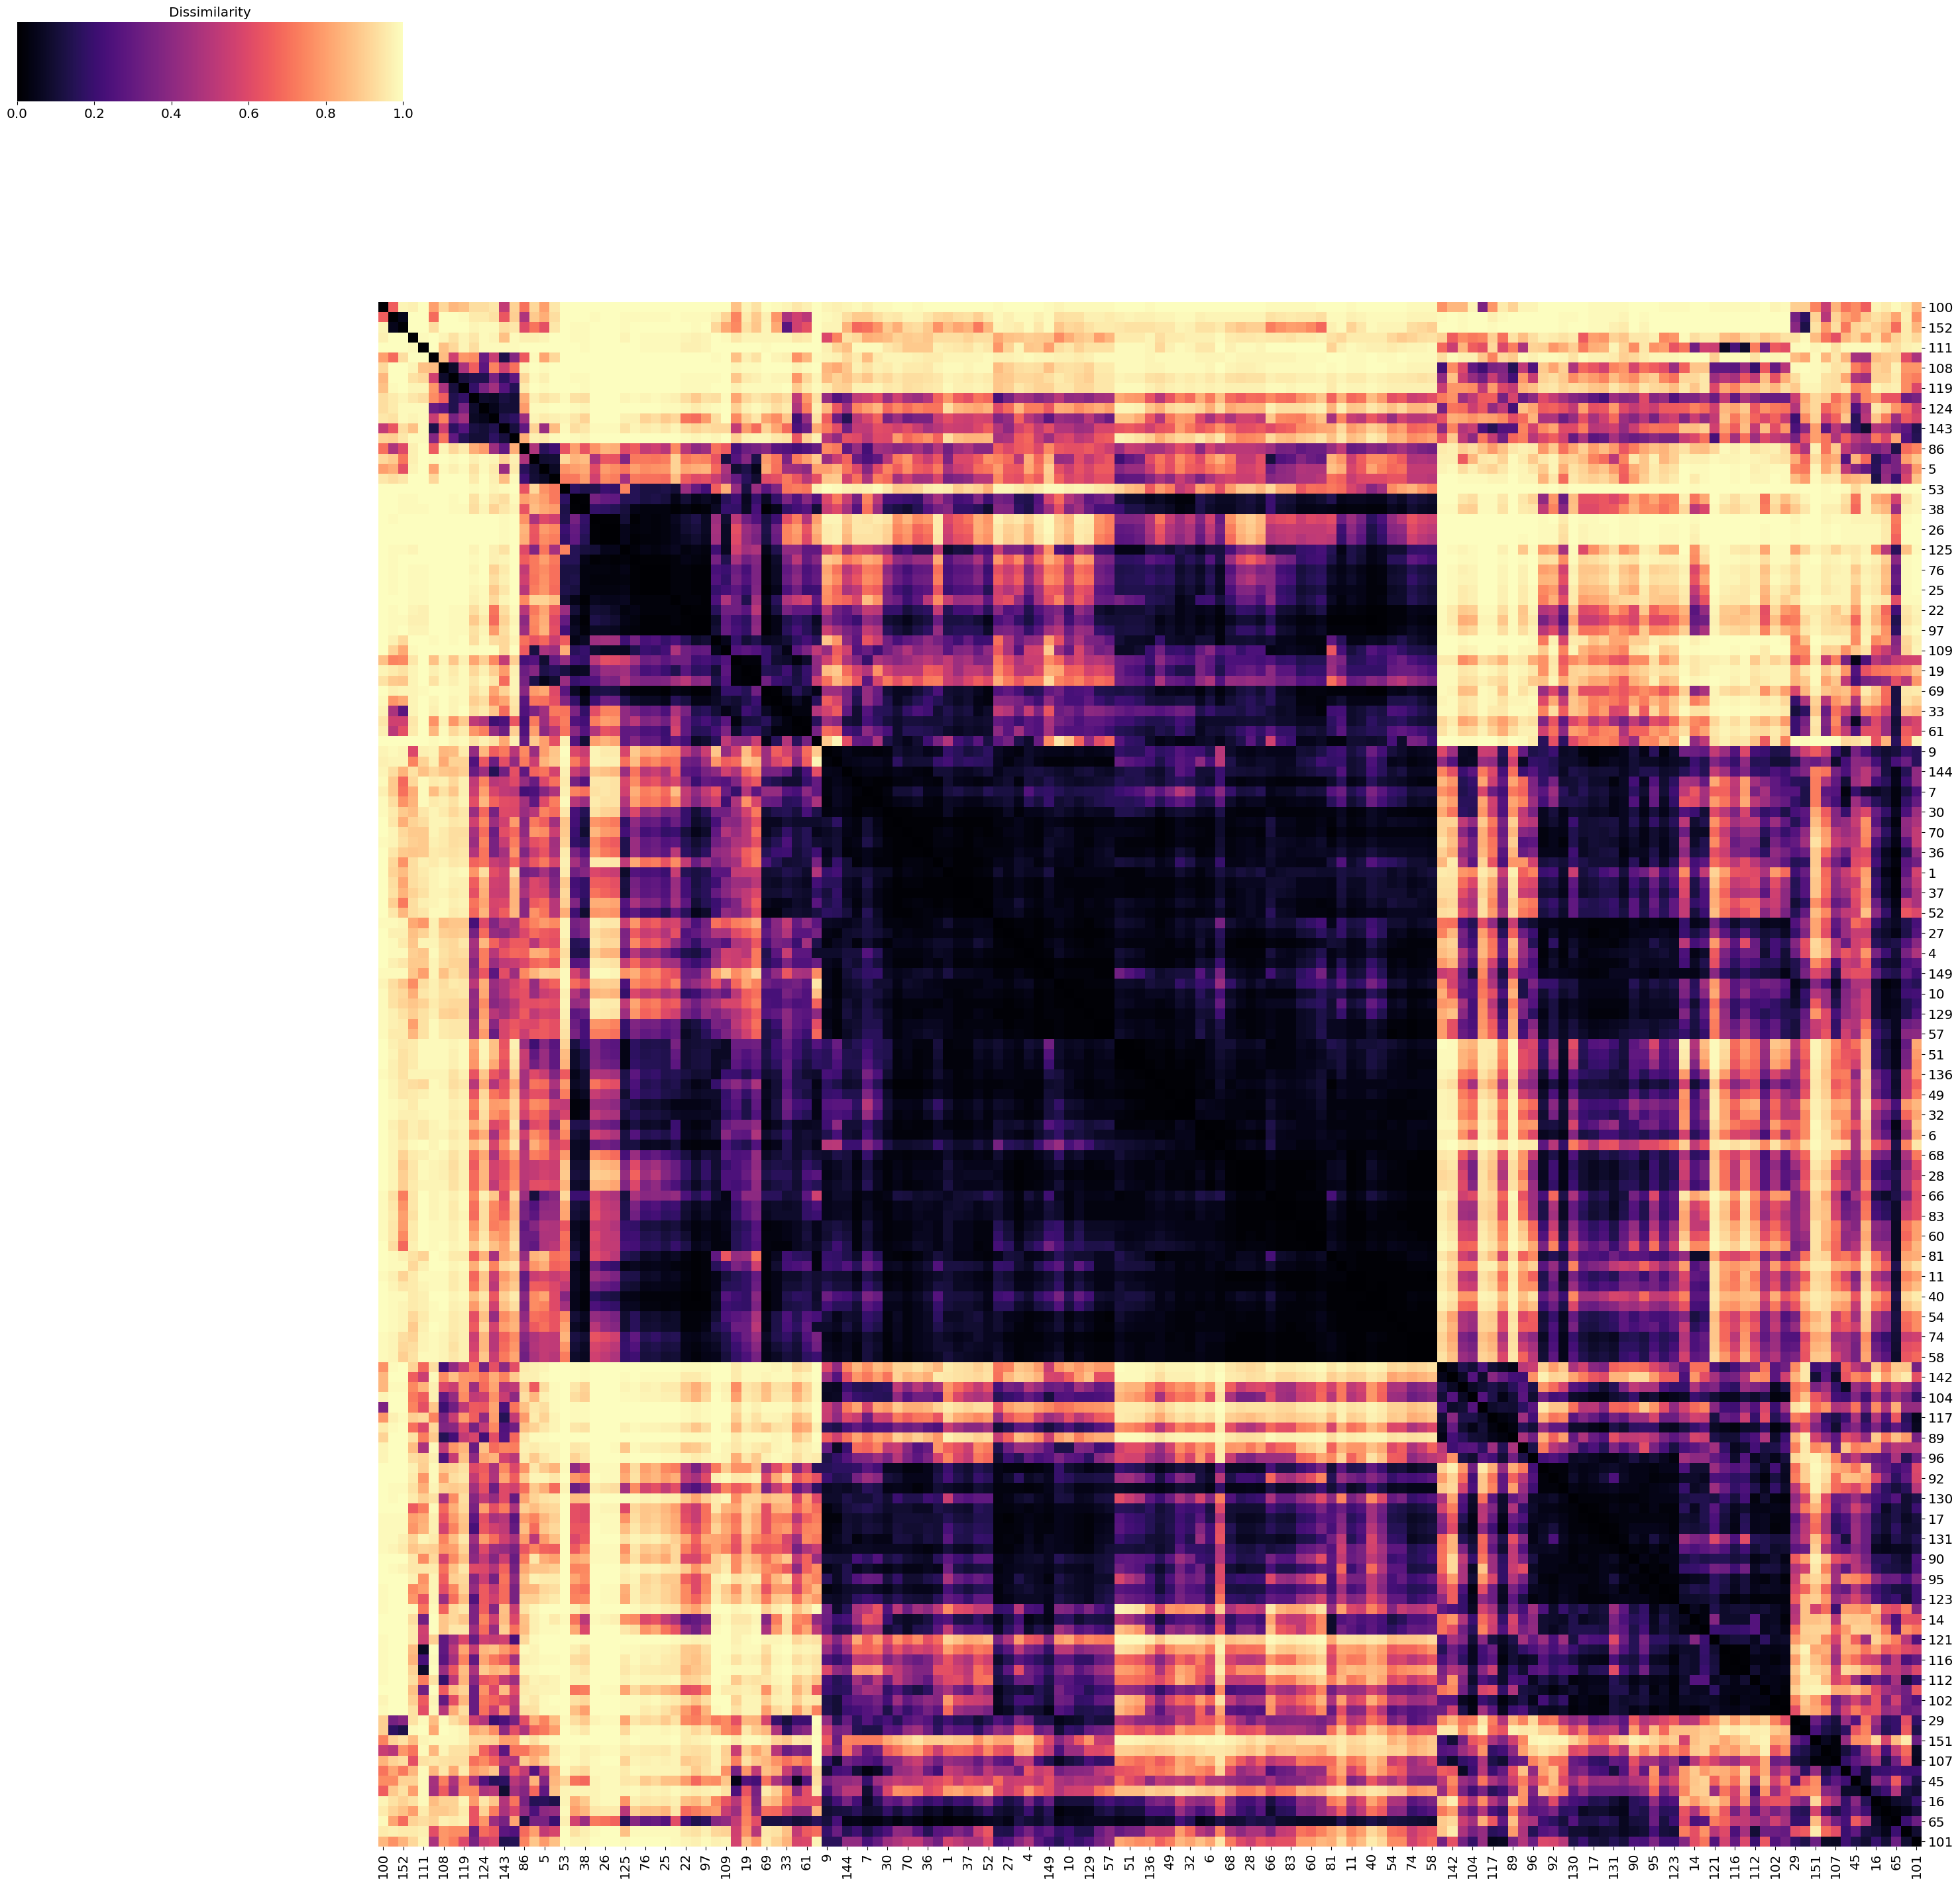

In [ ]:
cluster_map = sns.clustermap(np.round(profiles_distance_matrix, 2),
                             row_linkage=linkage, col_linkage=linkage,
                             figsize=(30, 30), cmap='magma',
                             cbar_kws={"orientation": "horizontal"},
                             row_cluster=True, col_cluster=True)
                            #  dendrogram_ratio=(0.1,0.1))
cluster_map.ax_cbar.tick_params(axis='x',labelsize='larger')
x0, _y0, _w, _h = cluster_map.cbar_pos
cluster_map.ax_cbar.set_position([x0, 0.9, cluster_map.ax_row_dendrogram.get_position().width, 0.04])
cluster_map.ax_cbar.set_title('Dissimilarity')
cluster_map.ax_heatmap.set_yticklabels([str(int(y.get_text()) + 1) for y in cluster_map.ax_heatmap.get_yticklabels()])
cluster_map.ax_heatmap.set_xticklabels([str(int(x.get_text()) + 1) for x in cluster_map.ax_heatmap.get_xticklabels()])
cluster_map.ax_row_dendrogram.set_visible(False)
cluster_map.ax_col_dendrogram.set_visible(False)
plt.show()

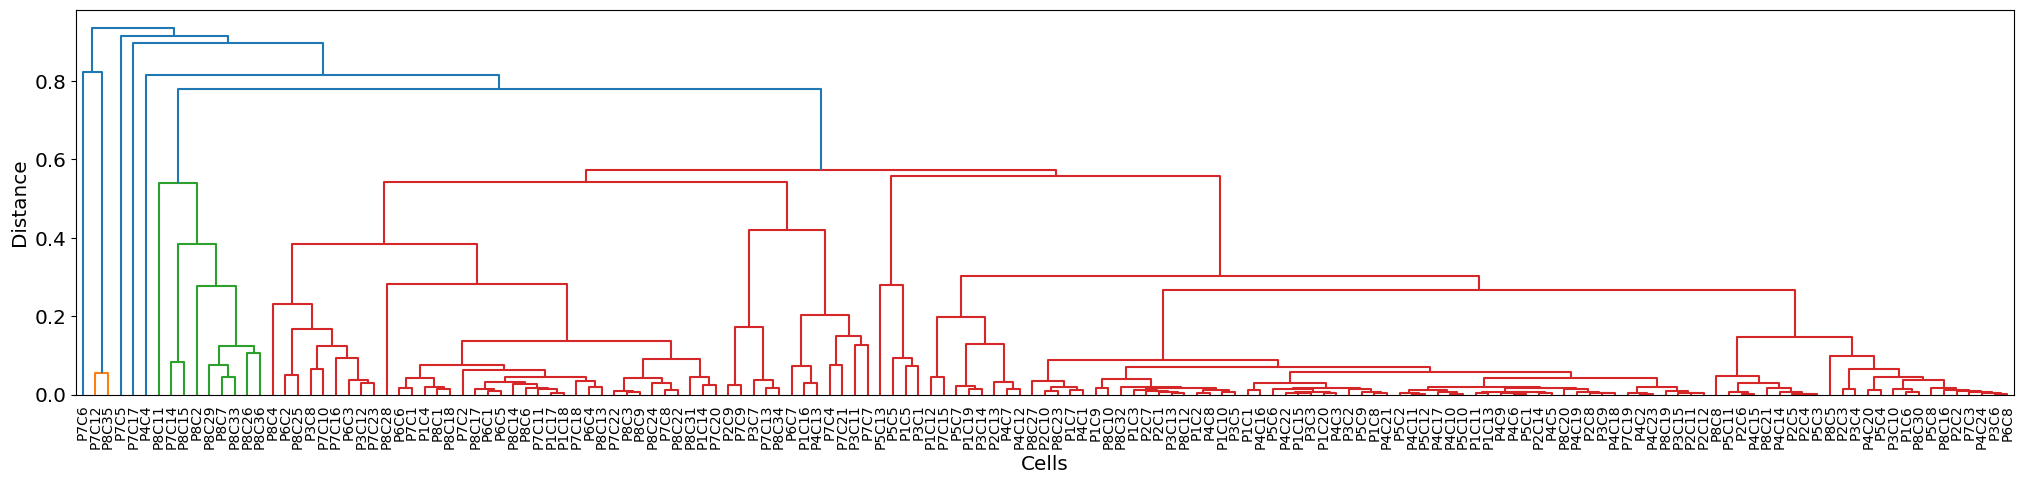

In [ ]:
# Dendrogram
profiles_distance_matrix_copy = np.copy(profiles_distance_matrix)
np.fill_diagonal(profiles_distance_matrix_copy, 0)
profiles_distance_matrix_copy.diagonal()

#labels=range(1, len(profiles_distance_matrix_copy) + 1)
labels = combined_df['ID'].unique().tolist() #[]
# for i in range(1, 5):  # P1 to P4
#     for j in range(1, 11):  # C1 to C10
#         labels.append(f'P{i}C{j}')

fig, ax = plt.subplots(figsize=(25, 5)) #25,5
profiles_distance_matrix_copy = squareform(profiles_distance_matrix_copy)
Z = hc.linkage(profiles_distance_matrix_copy, method='average')
hc.dendrogram(Z, labels=labels, ax=ax, leaf_rotation=90, leaf_font_size=10)
ax.set_xlabel('Cells')
ax.set_ylabel('Distance')
plt.show(fig)

In [ ]:
# Use MDS to visualize similarity/distance between cells
def plot_MDS(data_reduced, x_index=0, y_index=1, data=''):
    annot = []
    xs = []
    ys = []
    texts = []
    fig, ax = plt.subplots(figsize=(9, 9))

    # Define color and marker mapping
    if data == 'experiment': # plaques 1-8
        color_map = {
            range(0, 20): ('*', 'black'),
            range(20, 34): ('o', 'blue'),
            range(34, 49): ('<', 'green'),
            range(49, 73): ('D', 'red'),
            range(73, 86): ('X', 'cyan'),
            range(86, 94): ('s', 'magenta'),
            range(94, 117): ('^', 'gray'),
            range(117, 153): ('p', 'purple')
        }
        round_one_cells = [0, 20, 34, 49, 73, 86, 94, 117]
    elif data == 'toy-similar': # similar toy data
        color_map = {
            range(0, 10): ('*', 'black'),
            range(10, 20): ('o', 'blue'),
            range(20, 30): ('<', 'green'),
            range(30, 40): ('D', 'red')
        }
        round_one_cells = [0, 10, 20, 30]
    elif data =='toy-dissimilar': # dissimilar toy data
        color_map = {
            range(0, 11): ('*', 'black'),
            range(11, 24): ('o', 'blue'),
            range(24, 31): ('<', 'green'),
            range(31, 37): ('D', 'red'),
            range(37, 47): ('X', 'cyan'),
            range(47, 56): ('s', 'magenta'),
        }
        round_one_cells = [0, 11, 24, 31, 37, 47]

    legend_scatter = []
    legend_labels = []

    # Scatter plot with colors based on the color map
    for index_range, (marker, color) in color_map.items():
        indices = list(index_range)
        if indices:
            scatter = ax.scatter(data_reduced[indices, x_index], data_reduced[indices, y_index], marker=marker, color=color, s=50, alpha=0.75)
            legend_scatter.append(scatter)
            legend_labels.append(f'{list(color_map.keys()).index(index_range) + 1}')

    for round_one_cell in round_one_cells:
        if round_one_cell < len(data_reduced):
            xs.append(data_reduced[round_one_cell, x_index])
            ys.append(data_reduced[round_one_cell, y_index])
            annot.append(f'P{round_one_cells.index(round_one_cell) + 1}C1')
            ax.scatter(data_reduced[round_one_cell, x_index], data_reduced[round_one_cell, y_index], s=150, facecolors='none', edgecolors='k')
            # ax.annotate(f'P{round_one_cells.index(round_one_cell) + 1}C1',
            #             (data_reduced[round_one_cell, x_index], data_reduced[round_one_cell, y_index] - 0.01),
            #             ha='center', va='top', size='medium')

    # Create legend
    ax.legend(handles=legend_scatter, labels=legend_labels, bbox_to_anchor=(1.25, 0.75))
    ax.set_xlabel(f'MDS Dimension {x_index + 1}')
    ax.set_ylabel(f'MDS Dimension {y_index + 1}')
    for x, y, s in zip(xs, ys, annot):
        texts.append(plt.text(x, y, s))
    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, expand=(1.2, 2), arrowprops=dict(arrowstyle="->", color='k', lw=1.))
    #ax.set_title('Multidimensional Scaling')
    plt.show()

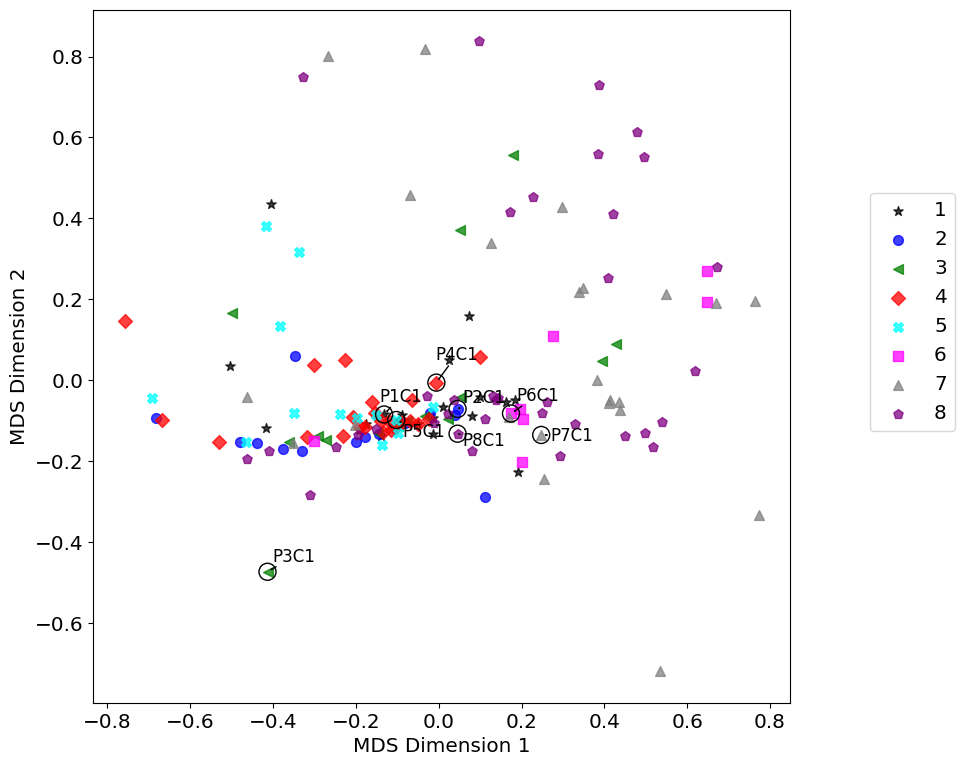

In [ ]:
embedding = MDS(n_components=2, dissimilarity='precomputed')
data_reduced = embedding.fit_transform(profiles_distance_matrix) # profiles_distance_matrix is the dissimilarity matrix

# Call the plot function
plot_MDS(data_reduced, x_index=0, y_index=1, data=data)